In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
import math as math

## Project background 

Main theme & importance 
observations, models that are different than what we are doing 

## Equations 

We consider the problem of landscape erosion with the differential equation: $$q_{s} = -D(s)\frac{\partial h}{\partial s}$$
and the diffusion equation: $$\frac{\partial h}{\partial t} = \frac{\partial^2 h}{\partial s^2}$$


and we consider the boundary condition: $$ h(s=0,t) = h_{max}$$ 

which implies that the sediment thickness is fixed at the maximum height at the initial boundary 

$$ h(t=0,0<s<L) = h_{max} s / L$$    
first boundary, 100 m inland from the coastline, the town nurtures the beach by inputting sediment to the coastline at a constant rate . 

$$ h(t=0,s = L) = 0$$
which implies that the sediment thickness is fixed at zero at the final boundary.

The fundamental process being modeled is the erosion of a coastline. The process of erosion is diffusive meaning that the materials move at a rate proportional to the topographic slope. $q_s$ is the volumetric flux per unit of width measured in $\frac{m^3}{s*m}$, D(s) is the diffusivity which is measured in $\frac{m^2}{s}$, H is the elevation on the surface of the coastline in m, and s is the horizontal axis (either x or y) in m. 

## Numerical Methods 

To analyze the evolution of the landscape, we are employing the Forward Euler method to solve the diffusion equation. We will also alter the initial condition several times to evaluate how varying the initial conditions can affect the erosion of the landscape over time. We chose the Forward Euler method to solve the diffusion equation because it is a relatively simple method and because the simplicity of our model, we believe this method would accurately capture the results of the model. 

#### Set Parameters 

In [74]:
D = 100   #function of the slope of the bedrock and thickness of the sediment
L = 5000 #m distance into ocean when h = 0 
H_max_init = 1000 #m 
qN = 1e6 #input of sediment from town nurturing beach
tf = 1000 

n = 200
s = np.linspace(0,L,n)
ds = s[1] - s[0]
C_D = 0.1
dt = (ds**2)*C_D/D

tf = 1000

nt = round(tf/dt) + 1

s = np.expand_dims(np.linspace(0, L, n), axis=1)
t = np.linspace(0, tf, nt+1)

#### Pre Allocate Vectors 

In [75]:
h = np.zeros([n, nt+1])
hinit = np.zeros([n, 1])

#### Diffusion evolution matrix 

In [76]:
data = np.array([C_D*np.ones(n), (1 - 2*C_D)*np.ones(n), C_D*np.ones(n)])
diags = np.array([-1, 0, 1])
M = spdiags(data, diags, n, n).toarray()

#### Boundary Conditions

In [77]:
M[-1,-1] = 1
M[-1,-2] = 0

M[0,0] = 1-C_D
M[0,1] = C_D
dhdsn = qN/D
Fknown = np.zeros(n)
Fknown[0] = dhdsn*D*dt/ds

#### Initial Condition

In [78]:
s1 = (x<L) 

hinit[s1] = H_max_init*s[s1]/L

h[:,0] = hinit.transpose()

#### Run Model

In [79]:
for k in np.arange(0,nt):
    hnew = np.matmul(M,h[:,k]) - Fknown
    h[:,k+1] = hnew.transpose()

#### Plot

Text(0.5, 1.0, 'Coastline evolution over 1000 years with constant input of sediment')

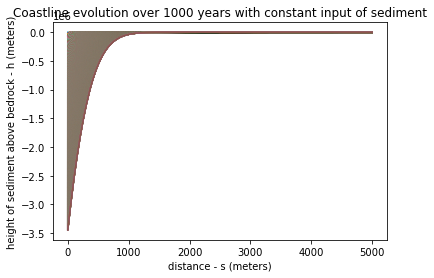

In [80]:
plt.plot(s,h)
plt.xlabel('distance - s (meters)')
plt.ylabel('height of sediment above bedrock - h (meters)')
plt.title ('Coastline evolution over 1000 years with constant input of sediment')

### Simulation with no sediment input 

In [81]:
qN = 0 #input of sediment from town nurturing beach

#### Pre Allocate Vectors 

In [82]:
h = np.zeros([n, nt+1])
hinit = np.zeros([n, 1])

#### Diffusion evolution matrix 

In [83]:
data = np.array([C_D*np.ones(n), (1 - 2*C_D)*np.ones(n), C_D*np.ones(n)])
diags = np.array([-1, 0, 1])
M = spdiags(data, diags, n, n).toarray()

#### Boundary Conditions

In [84]:
M[-1,-1] = 1
M[-1,-2] = 0

M[0,0] = 1-C_D
M[0,1] = C_D
dhdsn = qN/D
Fknown = np.zeros(n)
Fknown[0] = dhdsn*D*dt/ds

#### Initial Condition

In [85]:
s1 = (x<L) 

hinit[s1] = H_max_init*s[s1]/L

h[:,0] = hinit.transpose()

#### Run Model

In [86]:
for k in np.arange(0,nt):
    hnew = np.matmul(M,h[:,k]) - Fknown
    h[:,k+1] = hnew.transpose()

#### Plot

Text(0.5, 1.0, 'Coastline evolution over 1000 years with no sediment input')

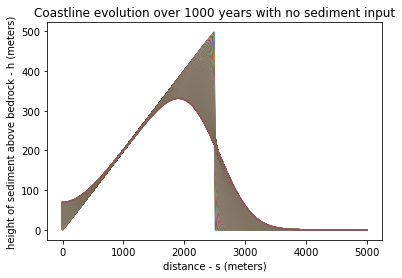

In [87]:
plt.plot(s,h)
plt.xlabel('distance - s (meters)')
plt.ylabel('height of sediment above bedrock - h (meters)')
plt.title ('Coastline evolution over 1000 years with no sediment input')

### Lower Sediment Input 

In [88]:
qN = 1e4 #input of sediment from town nurturing beach

#### Pre Allocate Vectors 

In [89]:
h = np.zeros([n, nt+1])
hinit = np.zeros([n, 1])

#### Diffusion evolution matrix 

In [90]:
data = np.array([C_D*np.ones(n), (1 - 2*C_D)*np.ones(n), C_D*np.ones(n)])
diags = np.array([-1, 0, 1])
M = spdiags(data, diags, n, n).toarray()

#### Boundary Conditions

In [91]:
M[-1,-1] = 1
M[-1,-2] = 0

M[0,0] = 1-C_D
M[0,1] = C_D
dhdsn = qN/D
Fknown = np.zeros(n)
Fknown[0] = dhdsn*D*dt/ds

#### Initial Condition

In [92]:
s1 = (x<L) 

hinit[s1] = H_max_init*s[s1]/L

h[:,0] = hinit.transpose()

#### Run Model

In [93]:
for k in np.arange(0,nt):
    hnew = np.matmul(M,h[:,k]) - Fknown
    h[:,k+1] = hnew.transpose()

#### Plot

Text(0.5, 1.0, 'Coastline evolution over 1000 years with lower sediment input than intial run')

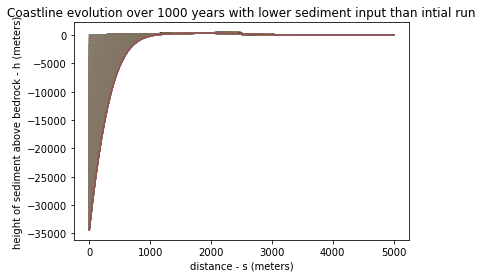

In [94]:
plt.plot(s,h)
plt.xlabel('distance - s (meters)')
plt.ylabel('height of sediment above bedrock - h (meters)')
plt.title ('Coastline evolution over 1000 years with lower sediment input than intial run')

### Simulation with more sediment input

In [95]:
qN = 1e8 #input of sediment from town nurturing beach

#### Pre Allocate Vectors 

In [96]:
h = np.zeros([n, nt+1])
hinit = np.zeros([n, 1])

#### Diffusion evolution matrix 

In [97]:
data = np.array([C_D*np.ones(n), (1 - 2*C_D)*np.ones(n), C_D*np.ones(n)])
diags = np.array([-1, 0, 1])
M = spdiags(data, diags, n, n).toarray()

#### Boundary Conditions

In [98]:
M[-1,-1] = 1
M[-1,-2] = 0

M[0,0] = 1-C_D
M[0,1] = C_D
dhdsn = qN/D
Fknown = np.zeros(n)
Fknown[0] = dhdsn*D*dt/ds

#### Initial Condition

In [99]:
s1 = (x<L) 

hinit[s1] = H_max_init*s[s1]/L

h[:,0] = hinit.transpose()

#### Run Model

In [100]:
for k in np.arange(0,nt):
    hnew = np.matmul(M,h[:,k]) - Fknown
    h[:,k+1] = hnew.transpose()

#### Plot

Text(0.5, 1.0, 'Coastline evolution over 1000 years with higher sediment input than initial')

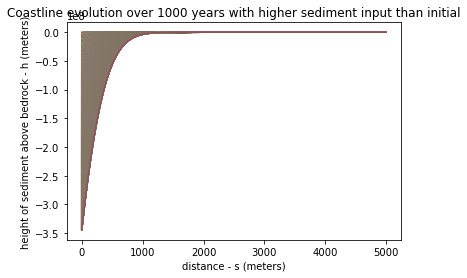

In [102]:
plt.plot(s,h)
plt.xlabel('distance - s (meters)')
plt.ylabel('height of sediment above bedrock - h (meters)')
plt.title ('Coastline evolution over 1000 years with higher sediment input than initial')

## Results 

What simulations did you run with the model?
Describe the results.
How do the results compare with any known solutions, or data?
How do the results change with different methods, time steps, grid spacing, or model parameters?
What did the model tell you about the process you were studying?
How could the model be improved in terms of methods used or processes included?


## References 